### 【問題1】コンペティション内容の把握

コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。


#### 1. Home Creditはどのような企業？

Home Credit BVは、1997年にチェコ共和国で設立され、オランダに本社を置く国際的なノンバンク金融機関です。同社は10か国で事業を展開しており、主に信用履歴がほとんどまたはまったくない人々への融資に重点を置いています。


#### 2. このコンペティションでは何を予測する？

顧客の返済能力


#### 3. それを予測することで企業が得られるメリットは何？

なるべくリスクを軽減した上で、顧客の獲得ができる。

### 【問題2】データの概観の把握

データの概観を把握するために以下のようなことを行ってください。

1. `.head()`、`.info()`、`describe()`などを使う
2. 欠損値の有無を見る
3. クラスの割合がわかるグラフを描く

#### 1. `.head()`、`.info()`、`describe()`などを使う

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("application_train.csv")

In [3]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

#### 2. 欠損値の有無を見る

In [6]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [7]:
import missingno as msno

In [8]:
#欠損値のあるものを表示する(ある：True, ない:False)
df.isnull().any(axis=0)

SK_ID_CURR                    False
TARGET                        False
NAME_CONTRACT_TYPE            False
CODE_GENDER                   False
FLAG_OWN_CAR                  False
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY      True
AMT_REQ_CREDIT_BUREAU_WEEK     True
AMT_REQ_CREDIT_BUREAU_MON      True
AMT_REQ_CREDIT_BUREAU_QRT      True
AMT_REQ_CREDIT_BUREAU_YEAR     True
Length: 122, dtype: bool

In [9]:
# 欠損値の個数を表示する(降順)
df_value = df.isnull().sum()
df_value[df_value>0].sort_values(ascending=False)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_AVG     213514
NONLIVINGAPARTMENTS_MODE    213514
                             ...  
EXT_SOURCE_2                   660
AMT_GOODS_PRICE                278
AMT_ANNUITY                     12
CNT_FAM_MEMBERS                  2
DAYS_LAST_PHONE_CHANGE           1
Length: 67, dtype: int64

In [10]:
# 欠損値の割合を表示する（降順）
rate0 = 0
samples = len(df)
missing_rate = df.isnull().sum()/samples * 100
missing_rate[missing_rate > rate0].sort_values(ascending=False)

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
                              ...    
EXT_SOURCE_2                 0.214626
AMT_GOODS_PRICE              0.090403
AMT_ANNUITY                  0.003902
CNT_FAM_MEMBERS              0.000650
DAYS_LAST_PHONE_CHANGE       0.000325
Length: 67, dtype: float64

#### 3. クラスの割合がわかるグラフを描く

In [11]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

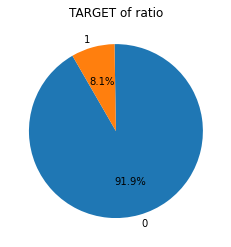

In [12]:
label_data = df['TARGET'].value_counts()
label = ["0", "1"]
plt.title("TARGET of ratio")
plt.pie(label_data, labels=label, startangle=120, autopct="%1.1f%%")
plt.show()

**0：支払いができるクライアント**

**1：支払いが困難なクライアント**

### 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

**まずはターゲットと相関の高いものを抜き出す**

<AxesSubplot:>

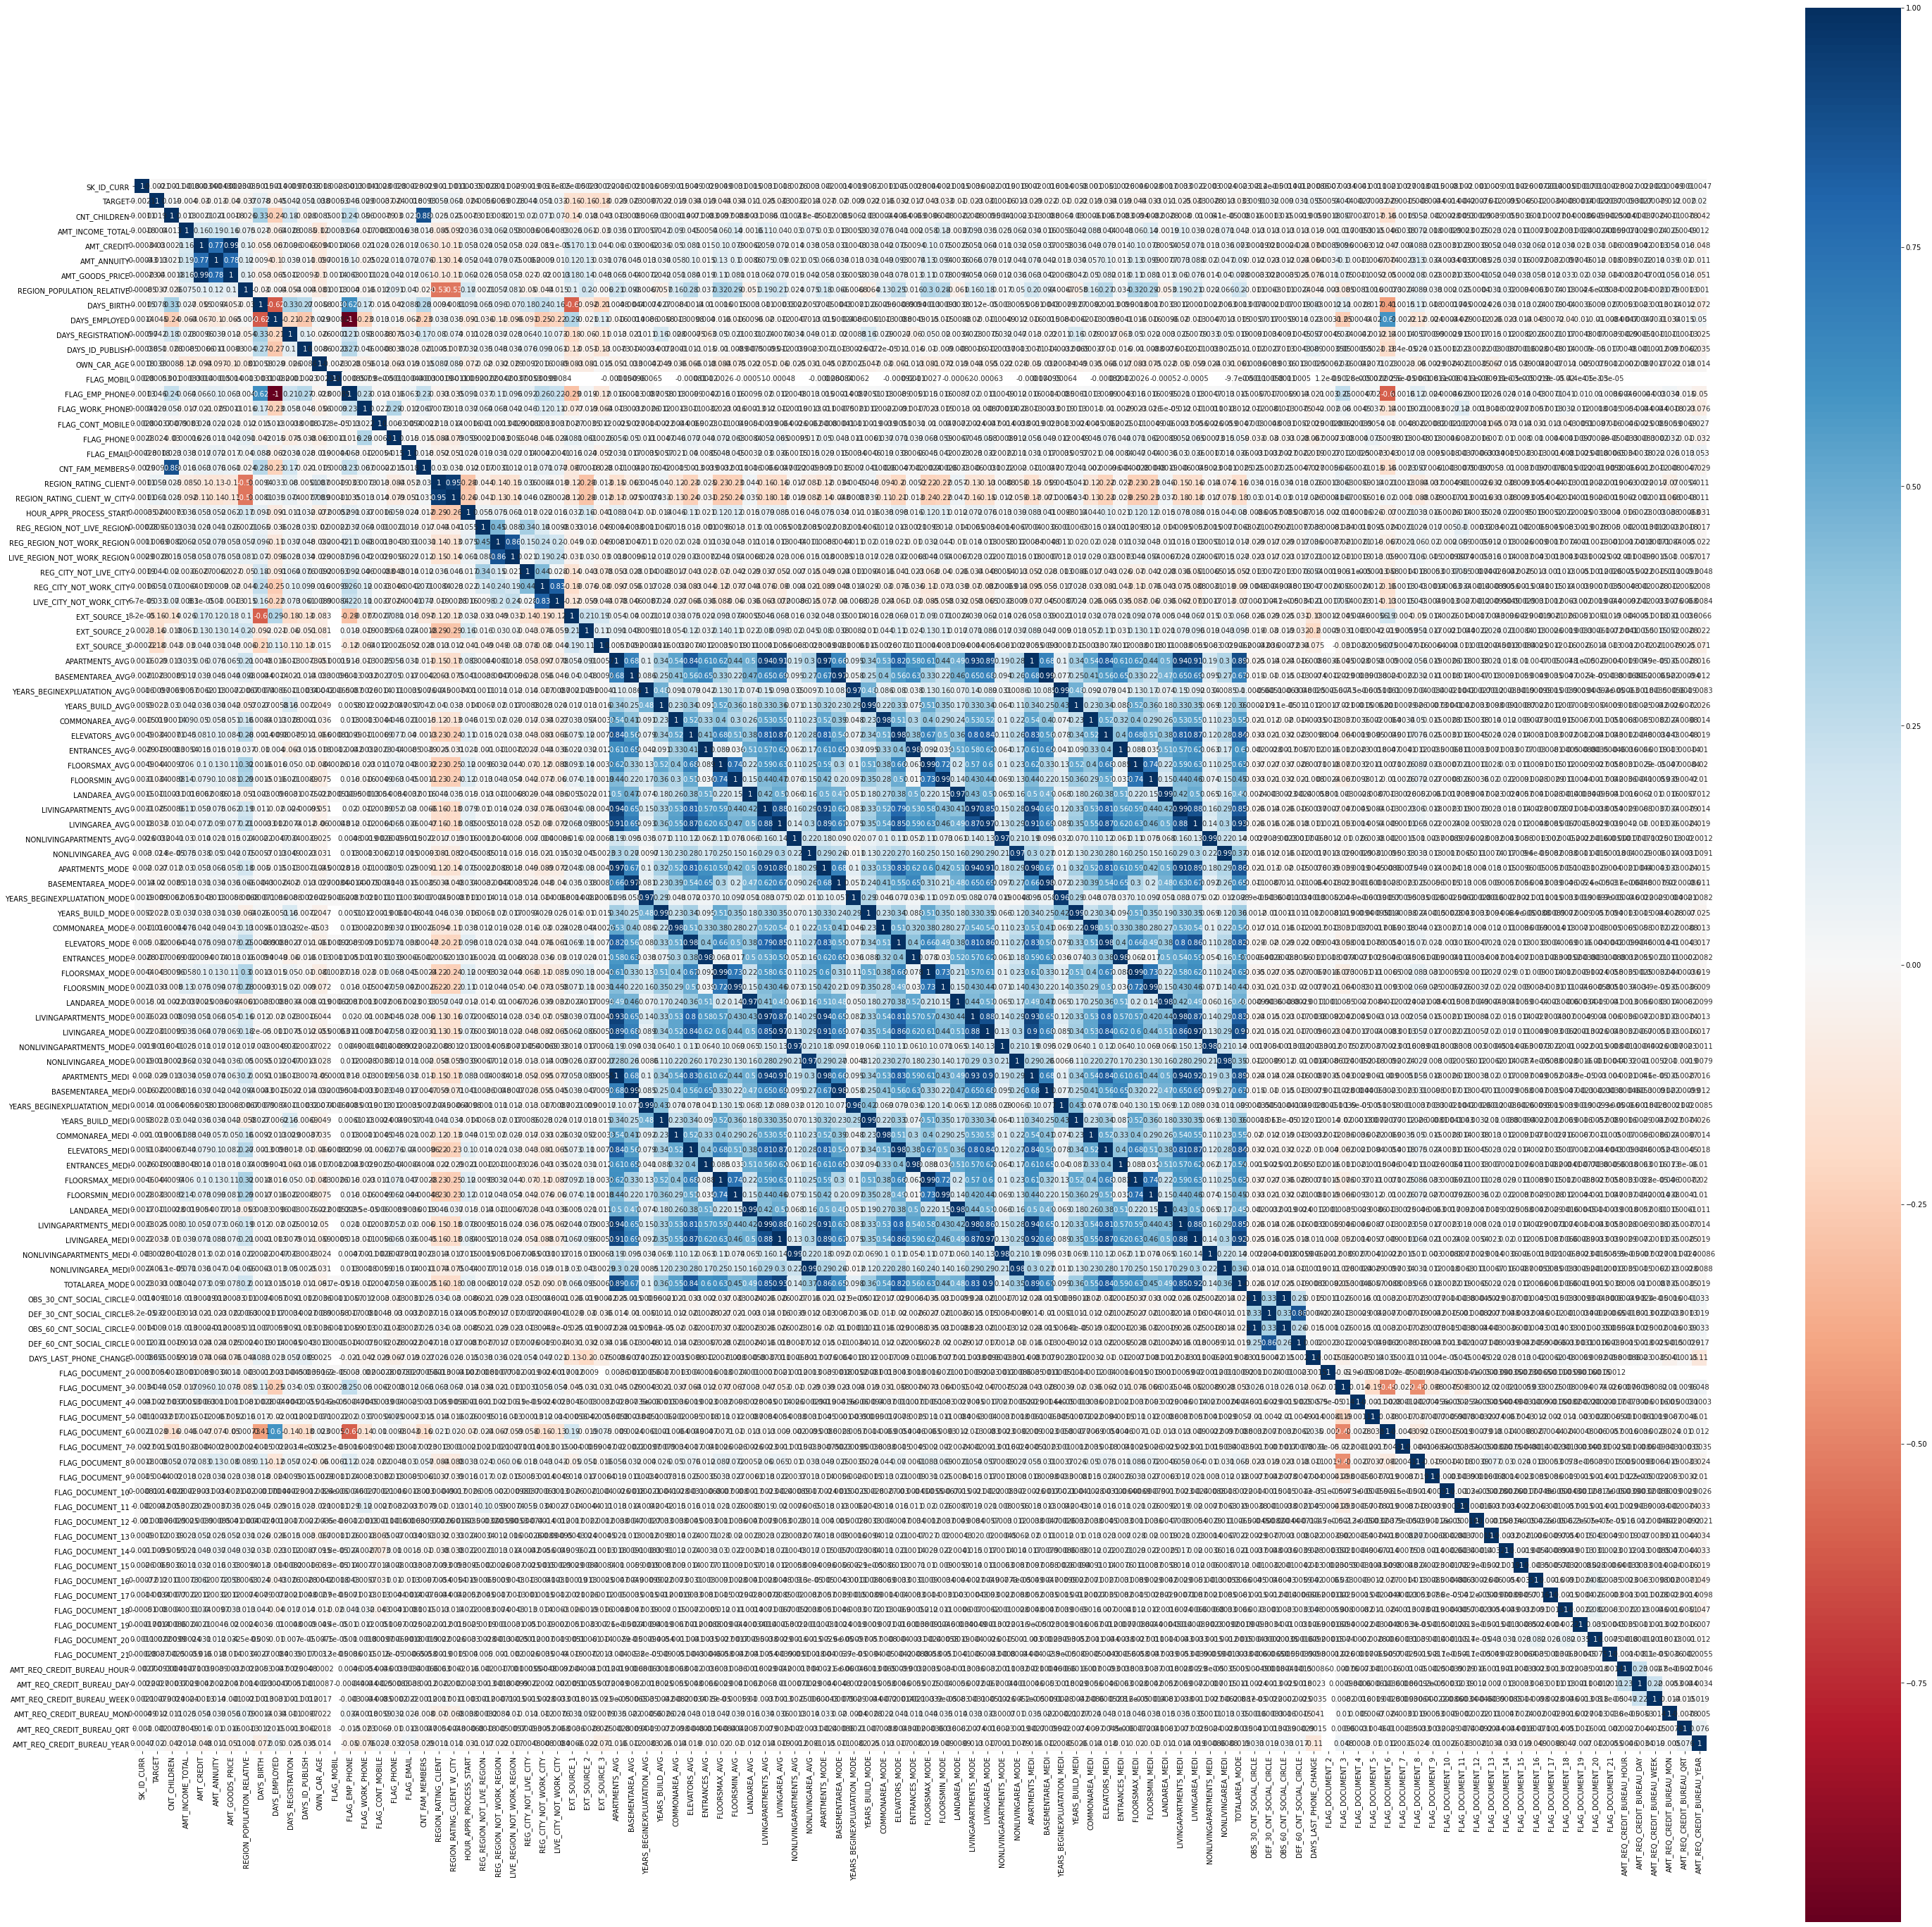

In [13]:
# ヒートマップで目的変数(TARGET)と相関性の高いものを可視化

df_corr = df.corr()

colormap = plt.cm.RdBu
plt.figure(figsize=(50,50))
sns.heatmap(df_corr, square=True, cmap=colormap, annot=True)

**なんとなくはわかるが、特徴量が多すぎてわかりにくい。。**

**目的変数(TARGET)と相関性の高いものを、相関性が高い方から順に10個表示させてみる**

In [14]:
#目的変数(TARGET)と正の相関性の高いものを、相関性が高い方から順に10個表示

df_corr_plus = df_corr['TARGET'].sort_values(ascending=False)# ascending=Trueで負の相関性になる
print('\nMost Negative Correlations:\n', df_corr_plus[1:].head(10))


Most Negative Correlations:
 DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
Name: TARGET, dtype: float64


In [15]:
#目的変数(TARGET)と負の相関性の高いものを、相関性が高い方から順に10個表示

df_corr_minus = df_corr['TARGET'].sort_values(ascending=True)# ascending=Falseで正の相関性になる

print('Most Positive Correlations:\n', df_corr_minus.head(10))

Most Positive Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


#### 正の相関性の高い上位5位の各特徴量について

**DAYS_BIRTH**：お申し込み時のご依頼者様の年齢（日単位)

**REGION_RATING_CLIENT_W_CITY**：都市を考慮したお客様のお住まいの地域の評価(1,2,3)

**REGION_RATING_CLIENT**：お客様のお住まいの地域の評価(1,2,3)

**DAYS_LAST_PHONE_CHANGE**：申し込みの何日前にクライアントが電話を買い換えたか

**DAYS_ID_PUBLISH**：申し込みの何日前にクライアントが本人確認書類を変更したか

**→DAYS_BIRTH や REGION_RATING_CLIENT_W_CITYが相関性が高いことわかった。**

#### 負の相関性の高い上位5位の各特徴量について

**EXT_SOURCE_3**：外部データソースからの正規化スコア

**EXT_SOURCE_2**：外部データソースからの正規化スコア

**EXT_SOURCE_1**：外部データソースからの正規化スコア

**DAYS_EMPLOYED**：申請の何日前に現在の雇用を開始したか

**FLOORSMAX_AVG**：クライアントが住んでいる建物の情報を正規化したもの、平均値(_AVG接尾辞)、モード値(_MODE接尾辞)、中央値(_MEDI接尾辞)アパートの大きさ、共用部、居住面積、築年数、エレベーターの数、エントランスの数、建物の状態、階数

**→EXT_SOURCE_3 や EXT_SOURCE_2が相関性が高いことわかった。**

### 【問題3, 4】課題設定、データ探索

データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。


問題3で設定した課題・疑問を解決するためにデータ探索を進めます。探索で使用する表やグラフを、考察と共に 15個以上 作成してください。

探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

**疑問：**

正の相関が強い物と、負の相関が強い物で、それぞれがTARGETとどのような関係があるだろうか。
またそこから有益な情報が見えるだろうか。

**最初にTARGETと相関性の高いものがわかったので、各特徴量の相関性も見てみる。**

<AxesSubplot:>

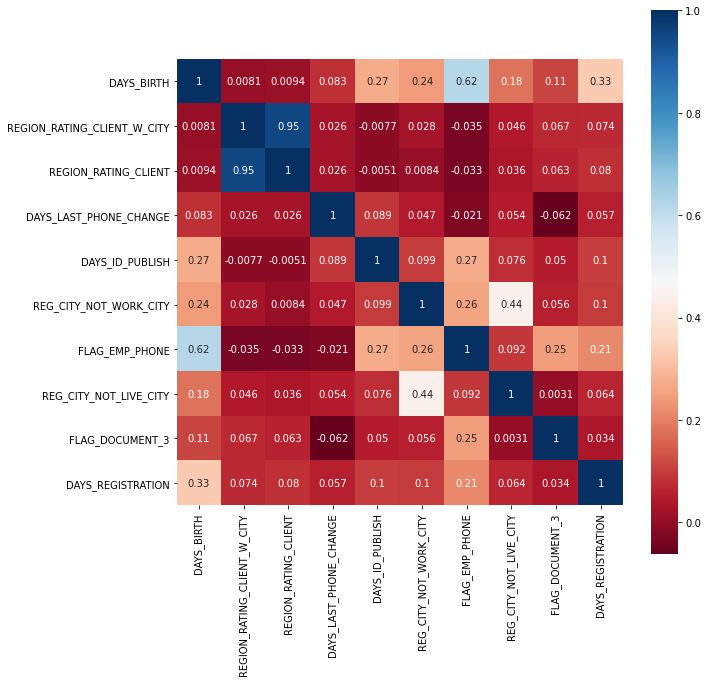

In [16]:
#正の相関の物
high_relationship_plus = ['DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 
                                    'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY', 
                                    'FLAG_EMP_PHONE', 'REG_CITY_NOT_LIVE_CITY', 
                                    'FLAG_DOCUMENT_3', 'DAYS_REGISTRATION']

high_relationship_plus = df[high_relationship_plus].corr()

colormap = plt.cm.RdBu
plt.figure(figsize=(10,10))
sns.heatmap(high_relationship_plus, square=True, cmap=colormap, annot=True)

**REGION_RATING_CLIENT_W_CITY と REGION_RATING_CLIENTの相関性が高いことがわかった。**

<AxesSubplot:>

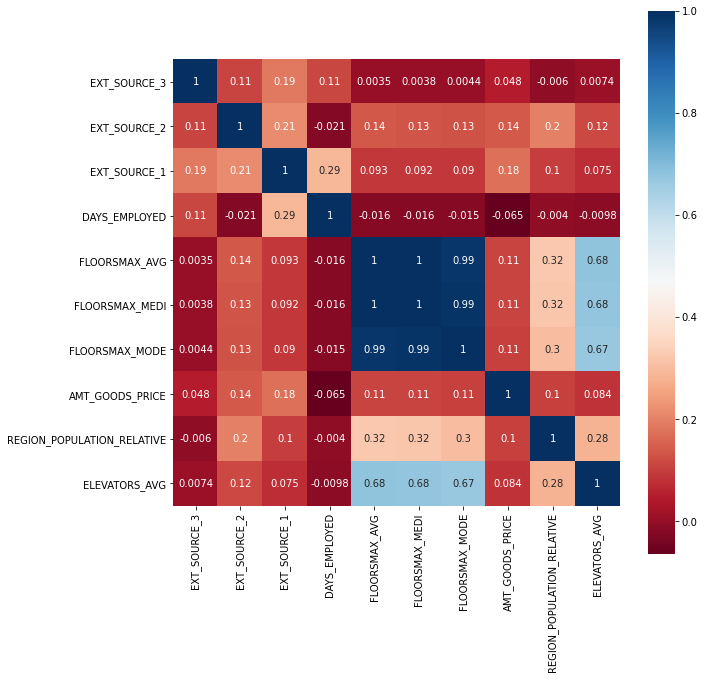

In [17]:
#負の相関の物
high_relationship_minus = ['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 
                                    'DAYS_EMPLOYED', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 
                                    'FLOORSMAX_MODE', 'AMT_GOODS_PRICE', 
                                    'REGION_POPULATION_RELATIVE', 'ELEVATORS_AVG']

high_relationship_minus = df[high_relationship_minus].corr()

colormap = plt.cm.RdBu
plt.figure(figsize=(10,10))
sns.heatmap(high_relationship_minus, square=True, cmap=colormap, annot=True)

**FLOORSMAX_AVG と FLOORSMAX_MODEの相関性が高いことがわかった。**
**FLOORSMAX_MEDI と FLOORSMAX_MODEの相関性が高いことがわかった。**

##### まずは正の相関が強かった年齢についてEDAして、有益な情報を引き出す。

In [18]:
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])
df['DAYS_BIRTH'].corr(df['TARGET'])

-0.07823930830982694

ターゲットとの間には負の線形関係があり、クライアントが年齢を重ねるにつれて、ローンを期限内に返済する頻度が高くなる傾向があることを意味している。

年齢のヒストグラムを作成する。プロットをもう少しわかりやすくするために、x軸を年単位にする。

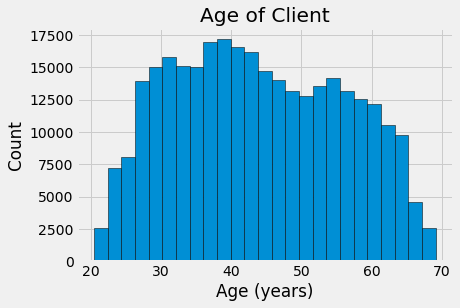

In [19]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(df['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

ターゲットに対する年齢の影響を可視化するために、次に、ターゲットの値で色分けしたカーネル密度推定プロット（KDE）を作成する。カーネル密度推定プロットは、単一の変数の分布を示し、平滑化ヒストグラムと考えることができます（各データポイントでカーネル（通常はガウス分布）を計算し、個々のカーネルをすべて平均化して、単一の平滑曲線を作成することによって作成される）。このグラフにはseaborn kdeplotを使う。

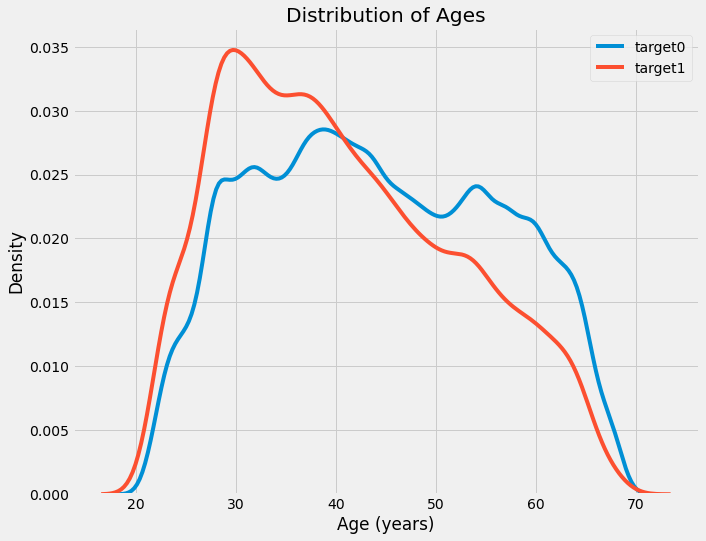

In [20]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 0, 'DAYS_BIRTH'] / 365)

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 1, 'DAYS_BIRTH'] / 365)

plt.legend(['target0', 'target1'])

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

ターゲット 1(赤)の曲線は、若い年齢層 (30代)に傾いて見える。これは有意な相関関係ではないが（相関係数は-0.07）、この変数はターゲットに影響を与えるので、機械学習モデルでは有用であると思われる。この関係を別の方法で見てみる。

**→年齢層別の平均的なローン返済失敗率**

このグラフを作成するために、まず、年齢区分を5年ずつに分ける。次に、それぞれの年齢区分ごとに返済されなかったローンの割合を示す目標の平均値を計算する。

In [21]:
age_data = df[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

/Users/SHOTA/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/SHOTA/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


TARGET  DAYS_BIRTH  YEARS_BIRTH  YEARS_BINNED
0       1        9461    25.920548  (25.0, 30.0]
1       0       16765    45.931507  (45.0, 50.0]
2       0       19046    52.180822  (50.0, 55.0]
3       0       19005    52.068493  (50.0, 55.0]
4       0       19932    54.608219  (50.0, 55.0]
5       0       16941    46.413699  (45.0, 50.0]
6       0       13778    37.747945  (35.0, 40.0]
7       0       18850    51.643836  (50.0, 55.0]
8       0       20099    55.065753  (55.0, 60.0]
9       0       14469    39.641096  (35.0, 40.0]

In [22]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

TARGET    DAYS_BIRTH  YEARS_BIRTH
YEARS_BINNED                                     
(20.0, 25.0]  0.123036   8532.795625    23.377522
(25.0, 30.0]  0.111436  10155.219250    27.822518
(30.0, 35.0]  0.102814  11854.848377    32.479037
(35.0, 40.0]  0.089414  13707.908253    37.555913
(40.0, 45.0]  0.078491  15497.661233    42.459346
(45.0, 50.0]  0.074171  17323.900441    47.462741
(50.0, 55.0]  0.066968  19196.494791    52.593136
(55.0, 60.0]  0.055314  20984.262742    57.491131
(60.0, 65.0]  0.052737  22780.547460    62.412459
(65.0, 70.0]  0.037270  24292.614340    66.555108

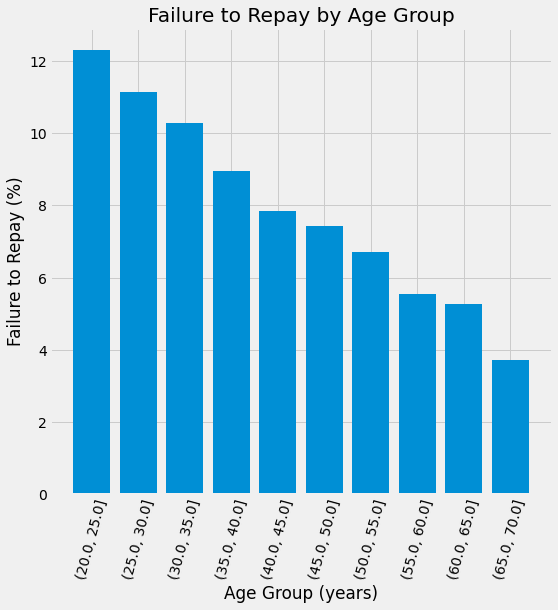

In [23]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

**【結論、考察】**

明確な傾向が見て取れる。若い申込者ほど返済しない可能性が高い。

返済できない率は、最も若い3つの年齢層では10％を超え、最も古い年齢層では5％以下です。

若い顧客はローンを返済する可能性が低い。これは、銀行が若年層を差別すべきという意味ではないが、若年層の顧客が期日通りに返済できるように予防策を講じるのは賢明だろう。

##### 次に負の相関が強かったEXT_SOURCEについてEDAして、有益な情報を引き出す。

一方で、ターゲットとの負の相関が最も強い3つの変数は、EXT_SOURCE_1、EXT_SOURCE_2、EXT_SOURCE_3です。ドキュメントによると、これらの特徴は「外部データソースからの正規化されたスコア」を表している。これが具体的に何を意味しているのかはわからないが、多数のデータソースを使って作られた累積的な信用格付けのようなものなのかもしれない。

まず、EXT_SOURCEの特徴量と対象との相関関係、そしてお互いの相関関係を見てみる。

In [24]:
ext_data = df[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH
TARGET        1.000000     -0.155317     -0.160472     -0.178919   -0.078239
EXT_SOURCE_1 -0.155317      1.000000      0.213982      0.186846    0.600610
EXT_SOURCE_2 -0.160472      0.213982      1.000000      0.109167    0.091996
EXT_SOURCE_3 -0.178919      0.186846      0.109167      1.000000    0.205478
DAYS_BIRTH   -0.078239      0.600610      0.091996      0.205478    1.000000

<AxesSubplot:>

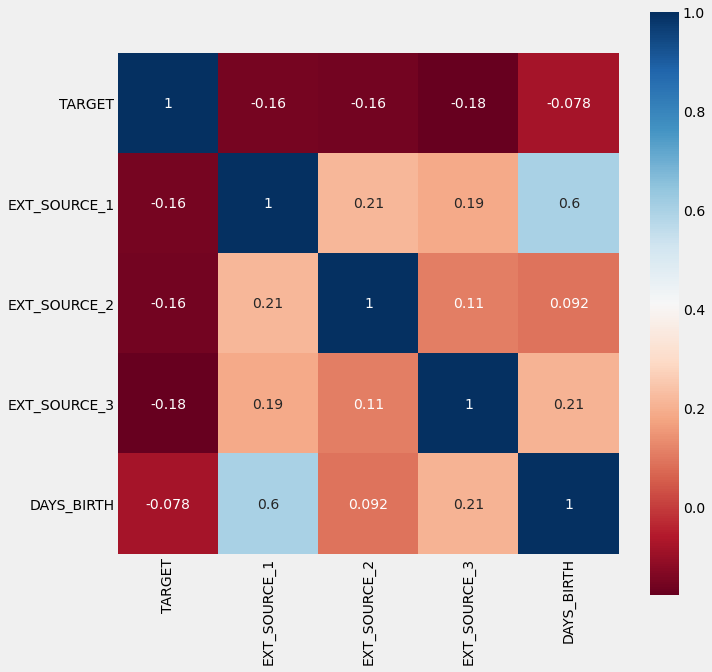

In [25]:
# ヒートマップで可視化する

colormap = plt.cm.RdBu
plt.figure(figsize=(10,10))
sns.heatmap(ext_data_corrs, square=True, cmap=colormap, annot=True)

3 つの EXT_SOURCE の特徴はすべてターゲットと負の相関があり、EXT_SOURCE の値が高くなると、クライアントはローンを返済する可能性が高くなることを示している。また、DAYS_BIRTHはEXT_SOURCE_1と正の相関があり、このスコアの要因の一つが顧客の年齢であることを示している。

次に、ターゲットの値によって色分けされたこれらの特徴のそれぞれの分布を見る。これは、ターゲットに対するこの変数の効果を可視化することができる。

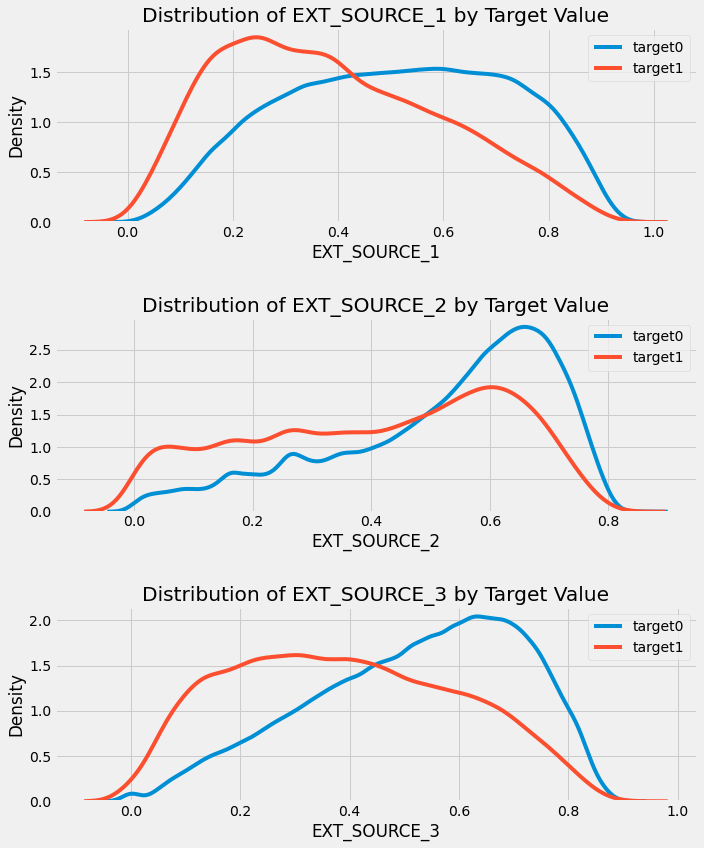

In [26]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(df.loc[df['TARGET'] == 0, source])
    # plot loans that were not repaid
    sns.kdeplot(df.loc[df['TARGET'] == 1, source])
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    plt.legend(['target0', 'target1'])
    
plt.tight_layout(h_pad = 2.5)

EXT_SOURCE_3は、ターゲット間での最大の差を表示している。この特徴が、申請者がローンを返済する可能性と何らかの関係を持っていることがわかるが、この関係はあまり強くない。実際、これらの変数は非常に弱いと考えられるが、申請者が時間通りにローンを返済するかどうかを予測する機械学習モデルにはまだ有用であるだろう。